In [20]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier

### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [21]:
# Remove correlated features

def remove_corelated_features(X_train,val):
    """ Function to remove the correlated features
    
    This function accepts the dataframe X_train,val which creates a correlation matix and removes 
    the correlated features based on certain threshold.
    
    Keyword arguments:
    X_train - Pandas dataframe which contains the independent features.
    val - Certain threshold value by which correlated features to be dropped.
    to_drop - Columns to be dropped
    
    """
    
    
    
    
    return X_train.drop(to_drop,axis=1)



In [22]:
# check the distribution of the passed features
    
def cal_eval_metric(y_test, y_pred, metric):
    """  Check the distribution of the passed features
    
    This function will check for the metric passed(accuracy/precision/recall/f1) 
    and return the required value.
    
    Keyword Arguments:   
    y_test: actual target values
    y_pred: predicted target values
    metric: the metric to be calculated
    
    Return:
    score - Calculated Evaluation Score
    
    """
    
    
    
    
    
    return score



### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


In [23]:
# Code starts here
# read the dataset and extract the features and target separately
# Code starts here
train= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 7_Logistic Regression\Lending Club Loan Prediction\file (1)\train.csv")
train.drop('Id', axis=1, inplace=True)
print(train.info())
print(train.shape)
print(train.nunique())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131728 entries, 0 to 131727
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   131728 non-null  float64
 1   funded_amnt                 131728 non-null  float64
 2   term                        131728 non-null  int64  
 3   int_rate                    131728 non-null  int64  
 4   installment                 131728 non-null  float64
 5   grade                       131728 non-null  int64  
 6   emp_title                   131728 non-null  int64  
 7   home_ownership              131728 non-null  int64  
 8   annual_inc                  131728 non-null  float64
 9   verification_status         131728 non-null  int64  
 10  purpose                     131728 non-null  int64  
 11  title                       131728 non-null  int64  
 12  zip_code                    131728 non-null  int64  
 13  addr_state    

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,27000.0,27000.0,1,141,805.68,6,100315,4,120000.0,2,2,37697,747,4,16.33,0.0,1.0,14.0,0.0,20928.0,798,26.0,0.0,0.0,0.0,24502.20,0.0,0.0,0.0,48614.0,27900.0,0
1,15000.0,15000.0,0,77,551.36,3,94083,0,100000.0,1,2,7157,384,33,19.00,0.0,1.0,16.0,0.0,11051.0,688,20.0,0.0,0.0,0.0,838.69,0.0,0.0,0.0,47703.0,17000.0,0
2,7000.0,7000.0,0,8,222.28,0,64843,0,48000.0,0,2,8118,717,3,15.38,0.0,1.0,8.0,0.0,3579.0,172,18.0,0.0,0.0,0.0,5097.27,0.0,0.0,0.0,138287.0,19500.0,0
3,18950.0,18950.0,0,38,648.50,1,54947,4,54000.0,2,2,11576,627,41,28.22,0.0,0.0,7.0,0.0,35801.0,894,20.0,0.0,0.0,0.0,4407.62,0.0,0.0,0.0,75286.0,42800.0,0
4,35000.0,35000.0,1,108,976.04,4,56326,0,87000.0,2,1,8342,468,46,18.94,0.0,5.0,15.0,0.0,25391.0,506,29.0,0.0,0.0,0.0,17284.95,0.0,0.0,0.0,213561.0,52000.0,0


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

In [24]:
# Code starts here
corr_matrix= train.corr()
for column in corr_matrix.columns.tolist():
    for row in corr_matrix.index.tolist():
        if((abs(corr_matrix.loc[row,column])>.50) & (abs(corr_matrix.loc[row,column])<1)):
            print("{} and {}- {}".format(row,column,corr_matrix.loc[row,column]))

funded_amnt and loan_amnt- 0.9998048019088237
installment and loan_amnt- 0.9548585061692787
loan_amnt and funded_amnt- 0.9998048019088237
installment and funded_amnt- 0.9550951258158328
grade and int_rate- 0.9727804807164985
loan_amnt and installment- 0.9548585061692787
funded_amnt and installment- 0.9550951258158328
int_rate and grade- 0.9727804807164985
total_acc and open_acc- 0.6667505956672467
total_rev_hi_lim and revol_bal- 0.7778767422860193
open_acc and total_acc- 0.6667505956672467
collection_recovery_fee and recoveries- 0.8612512670973594
loan_status and recoveries- 0.5321275517120013
recoveries and collection_recovery_fee- 0.8612512670973594
revol_bal and total_rev_hi_lim- 0.7778767422860193
recoveries and loan_status- 0.5321275517120013


In [25]:
# Loan Amount,Funded Amount and installment are extremely co-related. Keep loan amount and drop other two.
# Also, int rate and grade. So keep grade and drop int rate
train.drop(['funded_amnt','installment','int_rate'], axis=1, inplace= True)

In [26]:
# Feature Engineering- Transformation
def power_trans(df,col,power):
    lst=[]
    for i in df[col]:
        if i<0:
            lst.append(-np.power(abs(i),power))
        else:
            lst.append(np.power(i,power))
    return pd.DataFrame(lst)

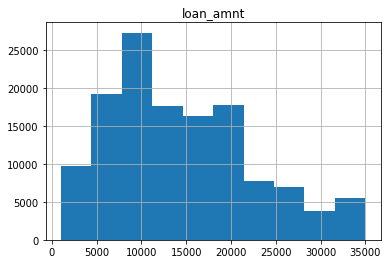

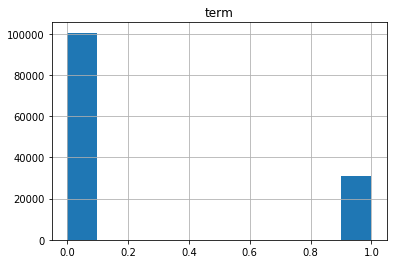

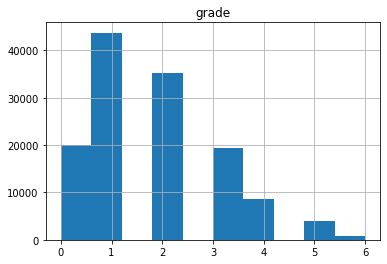

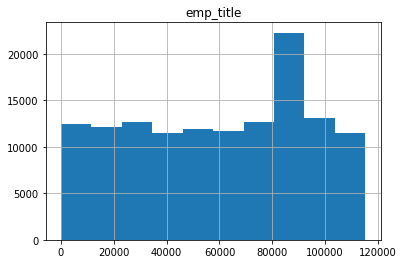

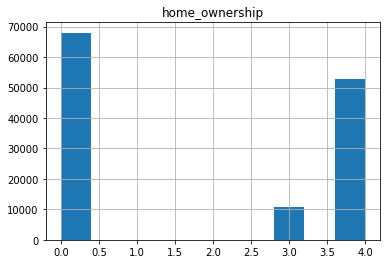

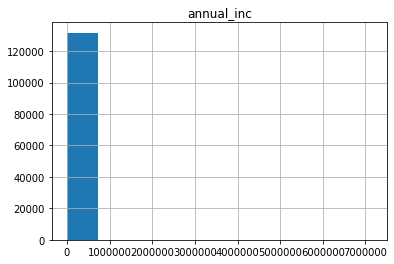

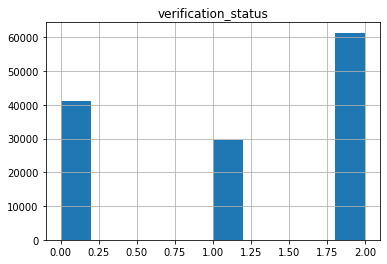

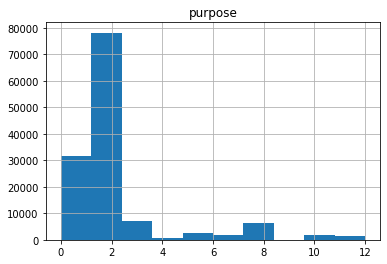

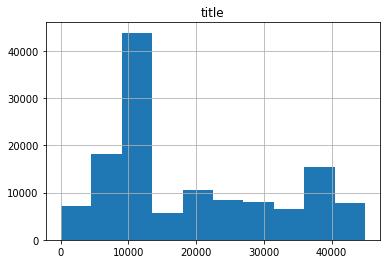

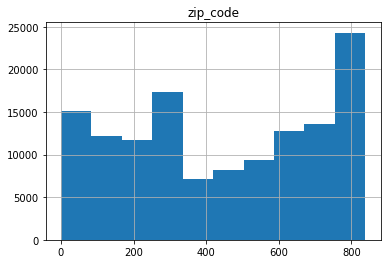

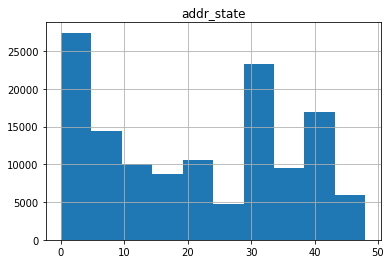

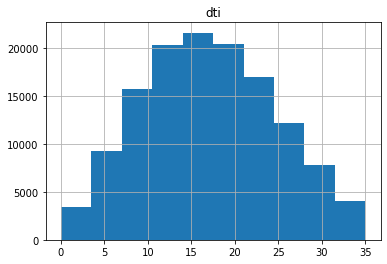

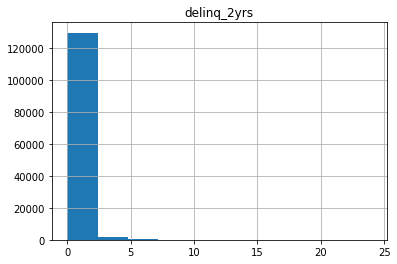

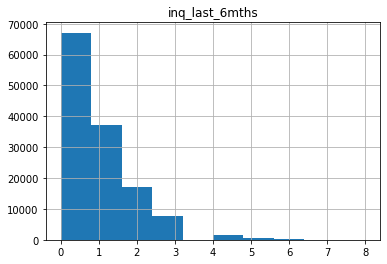

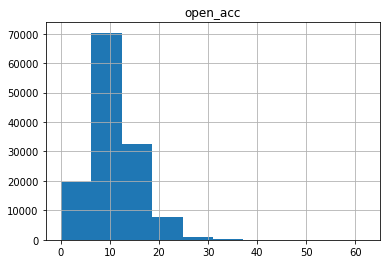

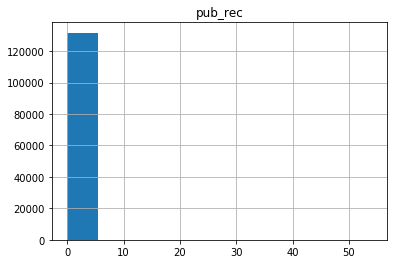

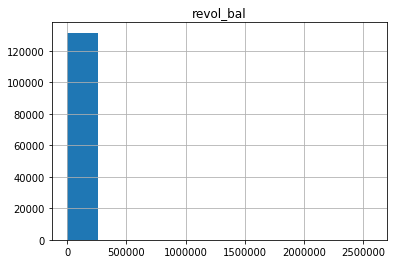

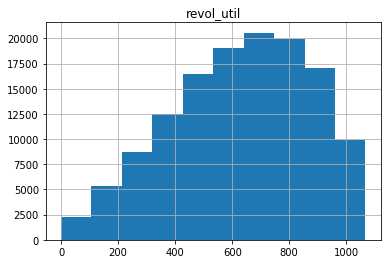

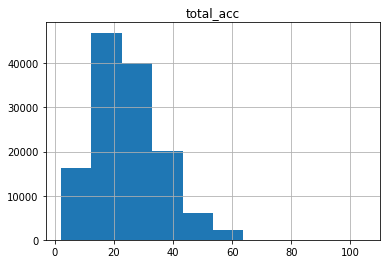

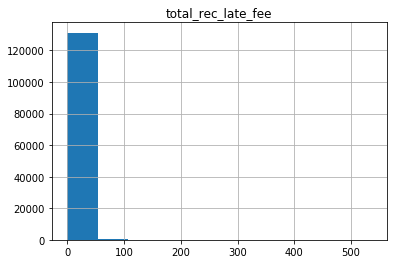

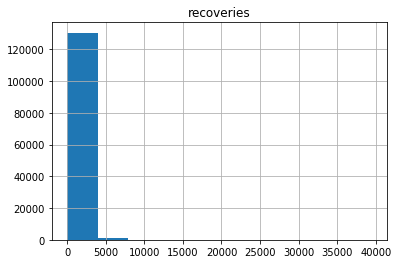

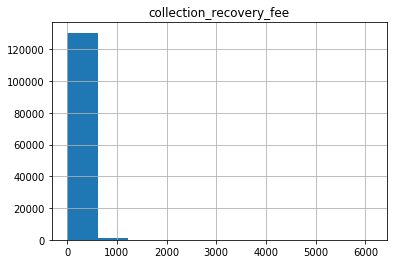

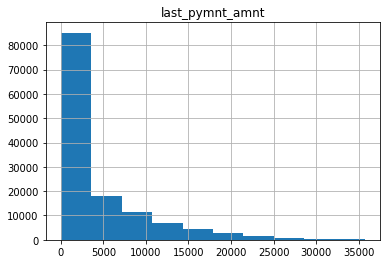

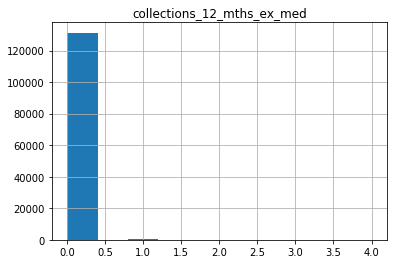

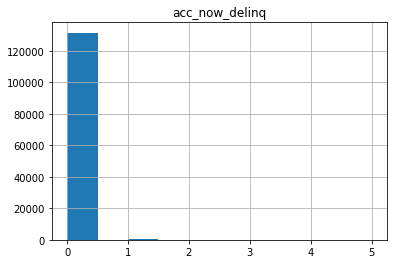

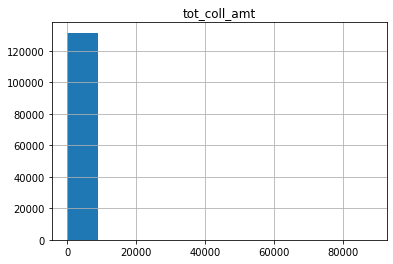

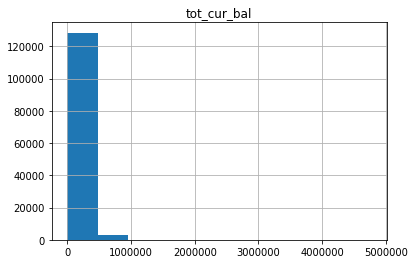

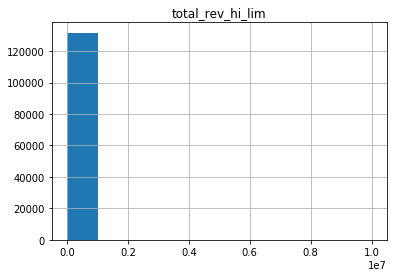

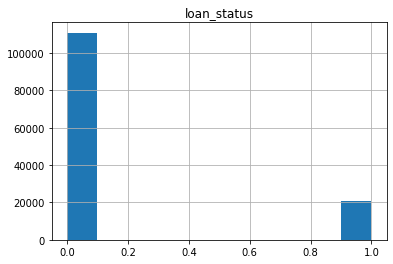

In [27]:
# Check the distribution of certain columns you might find of interest. 
for col in train.columns.tolist():
    train[col].hist()
    plt.title(col)
    plt.show()

In [28]:
train['loan_amnt'] = power_trans(train,'loan_amnt',0.5)
train['annual_inc']= power_trans(train,'annual_inc',0.001)
train['title']= power_trans(train,'title',0.55)
train['open_acc']= power_trans(train,'open_acc',0.4)
train['revol_util']= power_trans(train,'revol_util',1.5)
train['total_acc']= power_trans(train,'total_acc',0.22)
train['last_pymnt_amnt']= power_trans(train,'last_pymnt_amnt',0.2)
train['total_cur_bal']= power_trans(train,'tot_cur_bal',0.2)
train['total_rev_hi_lim']= power_trans(train,'total_rev_hi_lim',0.11)

In [14]:
train['funded_amnt'] = power_trans(train,'funded_amnt',0.5)
train['int_rate']= power_trans(train,'int_rate',0.51)
train['installment']= power_trans(train,'installment',0.5)

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score.



In [29]:
# Split the train data into train and validation set
X= train.drop('loan_status',axis=1)
y= train['loan_status']
for n in [5,7,9,10,11,13]:
    random_state=0
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    # Standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize the Logistic Regression Model 
    model= RandomForestClassifier(max_depth=15, random_state=0,criterion='entropy' )
    
    #ANNOVA 
    anova = SelectKBest(score_func = f_regression,  k = n)
    X_train = anova.fit_transform(X_train,y_train)
    X_test = anova.transform(X_test)
    
    #RFE
    #rfe = RFE(model,n)
    #X_train = rfe.fit_transform(X_train,y_train)
    #X_test = rfe.transform(X_test)
    
    #PCA
    #pca= PCA(n_components=11,random_state=0)
    #X_train= pca.fit_transform(X_train)
    #X_test= pca.transform(X_test)
    
    #Polynomial Features
    poly = PolynomialFeatures(2)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)
    
    #Predict the accuracy score
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    r2_scr= r2_score(y_test, pred)
    f1_scr= f1_score(y_test, pred)
    print("r2_score- {} , f1_score- {} , n= {}".format(r2_scr,f1_scr,n) )

r2_score- 0.9184066332130579 , f1_score- 0.964378509764479 , n= 5
r2_score- 0.9187906019979377 , f1_score- 0.9645401961606169 , n= 7
r2_score- 0.9187906019979377 , f1_score- 0.964522351757108 , n= 9
r2_score- 0.9185986176054979 , f1_score- 0.9644414625964441 , n= 10
r2_score- 0.9185986176054979 , f1_score- 0.9644354973997651 , n= 11
r2_score- 0.9182146488206181 , f1_score- 0.964261744966443 , n= 13


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [30]:
# Code starts here
test= pd.read_csv(r"C:\Users\vaibh\Desktop\Python DS\Sprint 7_Logistic Regression\Lending Club Loan Prediction\file (1)\test.csv")
Id = test['Id'].copy()
test.drop(['Id'],axis=1,inplace=True)

In [31]:
# Loan Amount,Funded Amount and installment are extremely co-related. Keep loan amount and drop other two.
# Also, int rate and grade. So keep grade and drop int rate
test.drop(['funded_amnt','installment','int_rate'], axis=1, inplace= True)

In [32]:
#Transformations
test['loan_amnt'] = power_trans(test,'loan_amnt',0.5)
test['annual_inc']= power_trans(test,'annual_inc',0.001)
test['title']= power_trans(test,'title',0.55)
test['open_acc']= power_trans(test,'open_acc',0.4)
test['revol_util']= power_trans(test,'revol_util',1.5)
test['total_acc']= power_trans(test,'total_acc',0.22)
test['last_pymnt_amnt']= power_trans(test,'last_pymnt_amnt',0.2)
test['total_cur_bal']= power_trans(test,'tot_cur_bal',0.2)
test['total_rev_hi_lim']= power_trans(test,'total_rev_hi_lim',0.11)

In [ ]:
test['funded_amnt'] = power_trans(test,'funded_amnt',0.5)
test['int_rate']= power_trans(test,'int_rate',0.51)
test['installment']= power_trans(test,'installment',0.5)

In [33]:
# Split the train data into train and validation set
X= train.drop('loan_status',axis=1)
y= train['loan_status']
for n in [7]:
    random_state=0
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=0.3)
    
    # Standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    test = scaler.transform(test)
    
    # Initialize the Logistic Regression Model 
    model= RandomForestClassifier(max_depth=15, random_state=0,criterion='entropy' )
    
    #ANNOVA 
    anova = SelectKBest(score_func = f_regression,  k = n)
    X_train = anova.fit_transform(X_train,y_train)
    test = anova.transform(test)
    
    #RFE
    #rfe = RFE(model,n)
    #X_train = rfe.fit_transform(X_train,y_train)
    #X_test = rfe.transform(X_test)
    
    #PCA
    #pca= PCA(n_components=11,random_state=0)
    #X_train= pca.fit_transform(X_train)
    #X_test= pca.transform(X_test)
    
    #Polynomial Features
    poly = PolynomialFeatures(2)
    X_train = poly.fit_transform(X_train)
    test = poly.transform(test)
    
    #Predict the accuracy score
    model.fit(X_train,y_train)
    pred= model.predict(test)

In [34]:
submission= pd.DataFrame({'Id':Id,'loan_status':pred})
submission.to_csv("Submission_DropColumns_Annova7.csv",index=False)